In [288]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [290]:
"""
Randomly generate some vectors for error measurements
"""
d = 100
rng = np.random.default_rng(seed=202206211)
X = rng.normal(scale=2/np.sqrt(d),size = (d,50))
Y = rng.normal(scale=2/np.sqrt(d),size = (d,50))

In [291]:
"""
Define the polynomials to approximate |x|.
Polynomials obtained by the Remez algorithm.
"""
ns = [2,3,4,8,16]
pwr = {i:np.arange(0,i+1,1) for i in ns}
coefs = {
    2:np.array([0,1.9303,-1.0655]),
    3:np.array([0,2.8680,-4.1784,2.3103]),
    4:np.array([0,3.8098,-10.3634,13.7198,-6.2356]),
    8:np.array([0,7.5904,-86.3344,570.0046,-2.032e3,4.0859e3,-4.6395e3,2.7738e3,-678.4572]),
    16:np.array([0,15.165653168012451,-6.973749639127177e+02,1.932444302852192e+04,-3.092349630482183e+05,3.107909469591776e+06,-2.089722857860436e+07,9.814517206152630e+07,-3.312245734587842e+08,8.170752873715845e+08,-1.484345975548608e+09,1.982010002473379e+09,-1.920420388816857e+09,1.312870436428275e+09,-6.001144121291750e+08, 1.645423775872881e+08, -2.045801314778578e+07]),
}

In [292]:
t = np.arange(-1,1,0.001)
ft = [np.sum([c*i**(2*p) for c,p in zip(coefs[16], pwr[16])]) for i in t]

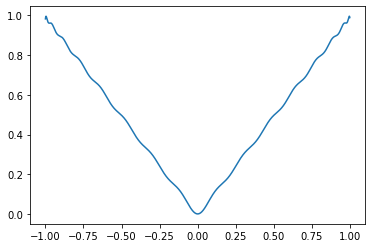

In [293]:
plt.plot(t,ft)

In [294]:
"""
Build feature maps for different dimensions D from 100 to 5000
Measure the average error of (|x*y| - ||x||* ||y|| * phi(x/||x||) * S * phi(y/||y||))^2 on 50 pairs of vectors in R^100.
"""
Ds = np.arange(100,5100,100)
rng_2 = np.random.default_rng(seed=202206212)
errors = {n:[] for n in ns}
for n in ns:
    error = []
    for D in Ds:
        phi, sign = [] , []
        err_D = 0
        """
        Construct the feature map
        """
        for i in range(D):
            N = rng_2.choice(pwr[n]) # randomly choose N from 0...n
            W = rng_2.choice([-1,1], size=(d, 2*N)) # generate 2N Rademacher vectors
            phi.append(lambda x, N=N, W=W: np.sqrt(abs(coefs[n][N])*(n+1)) * np.prod(W.T @ x)) # generate feature map with N_i
            sign.append(np.sign(coefs[n][N]))
        
        S = np.diag(sign)
        phi_X = np.zeros((D,50))
        phi_Y = np.zeros((D,50))
        norms_X = [np.linalg.norm(x) for x in X.T]
        norms_Y = [np.linalg.norm(y) for y in Y.T]
        for j in range(50):
            phi_X[:,j] = np.array([f(X[:,j]/norms_X[j]) for f in phi])/np.sqrt(D)
            phi_Y[:,j] = np.array([f(Y[:,j]/norms_Y[j]) for f in phi])/np.sqrt(D)
        for j in range(50):
            err_D += (norms_X[j] * norms_Y[j] * phi_X[:,j].T @ S @ phi_Y[:,j] - abs(X[:,j].T @ Y[:,j]))**2
        error.append(err_D/50)
    errors[n] += error

In [302]:
phi[0]

<function __main__.<lambda>(x, N=14, W=array([[ 1,  1, -1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1,  1,  1],
       [ 1, -1,  1, ..., -1,  1,  1],
       ...,
       [ 1, -1,  1, ...,  1,  1, -1],
       [ 1, -1,  1, ...,  1,  1, -1],
       [-1, -1,  1, ..., -1,  1,  1]]))>

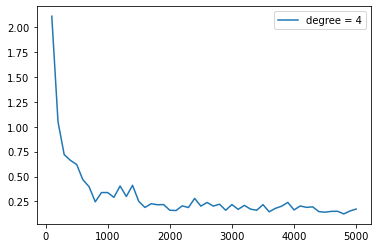

In [299]:
plt.plot(Ds,errors[2], label = f"degree = {4}")
plt.legend()
plt.show()

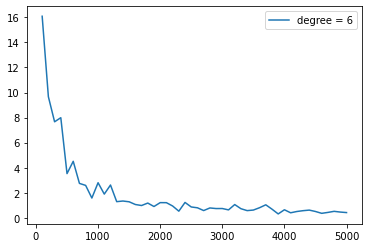

In [298]:
plt.plot(Ds,errors[3], label = f"degree = {6}")
plt.legend()
plt.show()

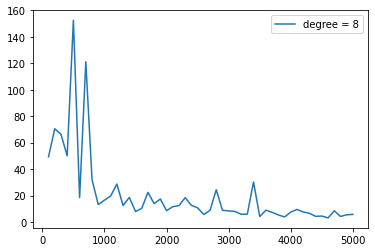

In [295]:
plt.plot(Ds,errors[4], label = f"degree = {8}")
plt.legend()
plt.show()

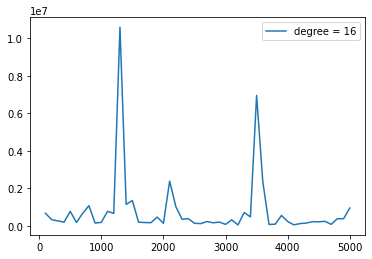

In [296]:
plt.plot(Ds,errors[8], label = f"degree = {16}")
plt.legend()
plt.show()

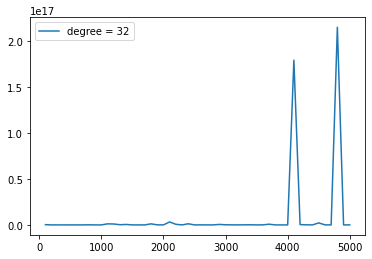

In [297]:
plt.plot(Ds,errors[16], label = f"degree = {32}")
plt.legend()
plt.show()